In [36]:
import pandas as pd
from pydicom import dcmread
import matplotlib.pyplot as plt
import os, sys
sys.path.insert(0, "\\".join(os.path.abspath(os.curdir).split("\\")[:-2:]))
from src.utils.utils import load_json

In [37]:
dictionary_inbreast = load_json("extracted_metadata_INBREAST", "../../outputs/mamografia/extracted_metadata")

normal = []
benign = []
malignant = []
inconclusive = []
bi_rads = set()

for metadata in dictionary_inbreast:
    if metadata['metadata_csv']['bi-rads'] == '0':
        inconclusive.append(metadata)
    elif metadata['metadata_csv']['bi-rads'] == '1':
        normal.append(metadata)
    elif metadata['metadata_csv']['bi-rads'] in ['2', '3', '4a', '4b']:
        benign.append(metadata)
    else:
        malignant.append(metadata)
        bi_rads.add(metadata['metadata_csv']['bi-rads'])
        
bi_rads

{'4c', '5', '6'}

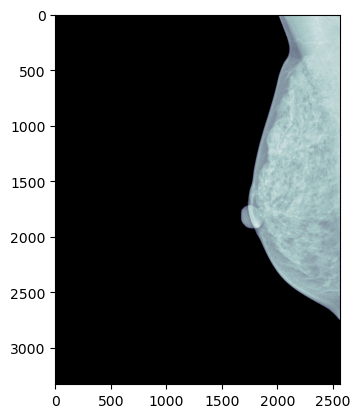

In [38]:
fig = plt.figure()
plt.imshow(dcmread(normal[1]['metadata_csv']['image_path']).pixel_array, cmap=plt.cm.bone)
plt.show()

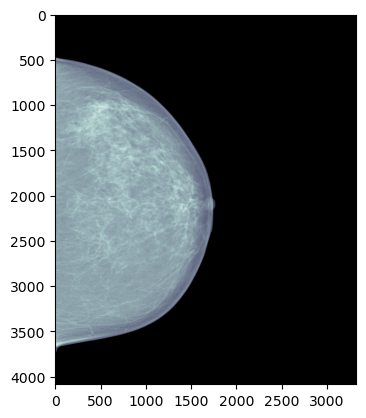

In [39]:
fig = plt.figure()
plt.imshow(dcmread(benign[40]['metadata_csv']['image_path']).pixel_array, cmap=plt.cm.bone)
plt.show()

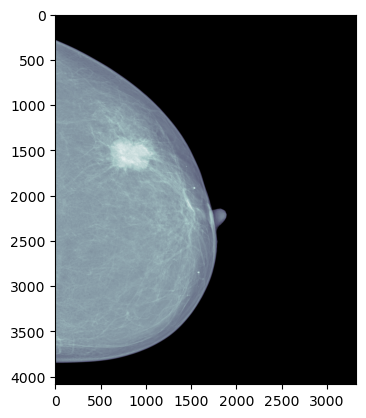

In [40]:
fig = plt.figure()
plt.imshow(dcmread(malignant[40]['metadata_csv']['image_path']).pixel_array, cmap=plt.cm.bone)
plt.show()

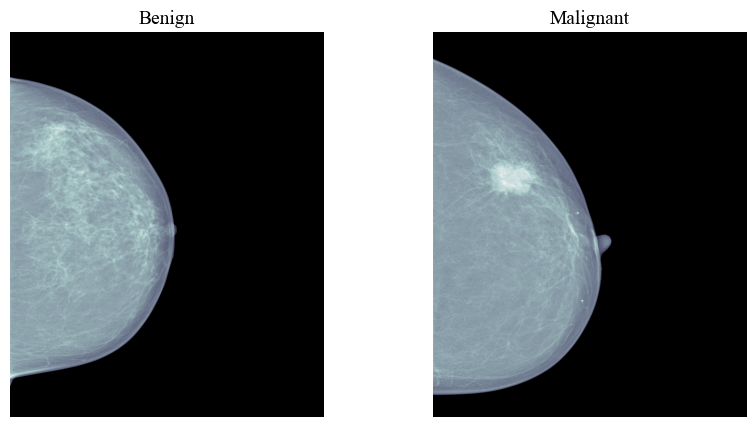

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(dcmread(benign[40]['metadata_csv']['image_path']).pixel_array, cmap=plt.cm.bone)
ax[0].set_title("Benign", family='Times New Roman', size=14)
ax[0].set_xticks([])
ax[0].axis('off')

ax[1].imshow(dcmread(malignant[40]['metadata_csv']['image_path']).pixel_array, cmap=plt.cm.bone)
ax[1].set_title("Malignant", family='Times New Roman', size=14)
ax[1].set_xticks([])
ax[1].axis('off')

plt.show()